In [1]:
import pandas as pd
import numpy as np
from modules.models import NaSh, get_flow
import matplotlib.pyplot as plt

## Fundamential diagramms

__NaSh__ with different slow effect probability

In [ ]:
density = [0.2, 0.4, 0.6, 0.8]

In [ ]:
table=pd.read_csv(f'data/nash_probability_0.2.csv')

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

for d in density:
    table = pd.read_csv(f'data/nash_probability_{d}.csv')
    label = "$p_{slow} = $"+str(d)
    plt.plot(table['density'], table['flow'], label=label)

plt.ylim(0,0.6)
plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
plt.title(r'NaSch model with different probability to slow', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [ ]:
fig.savefig('data/NaSh_prob.jpg', dpi = 400, pad_inches=10)

__Nash__ with different num of auto drive cars

In [ ]:
ADR_portion = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

for portion in ADR_portion:
    table = pd.read_csv(f'data/nash_auto_{portion}.csv')
    label = "$R_{HDV} = $"+f"{1-portion: .1f}"
    plt.plot(table['density'], table['flow'], label=label)
    
plt.ylim(0,1)
plt.xlim(0,1)   
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
plt.title(r'NaSch model with different HDR portion (p = 0.5)', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [ ]:
fig.savefig('data/NaSh_auto.jpg', dpi = 400, pad_inches=10)

__S-NFS__ model

1. for $p=1.0, L=100$ and $v_{max}$ = 1 or 3

In [121]:
p = 1.0
v_max = 1
r = ['0.0', '0.5', '1.0']
q = ['0.0', '0.5', '1.0']
name = 'abcdefghi'

In [122]:
grid = np.meshgrid(r,q)

In [123]:
data = [[0]*len(q) for _ in range(len(r))]
data_unif = [[0]*len(q) for _ in range(len(r))]
for i in range(len(r)):
    for j in range(len(q)):
        data_unif[i][j] = pd.read_csv(f'data/S-NFS_uniform_v_{v_max}_p_{p}_q_{grid[0][i][j]}_r_{grid[1][i][i]}.csv')
        data[i][j] = pd.read_csv(f'data/S-NFS_v_{v_max}_p_{p}_q_{grid[0][i][j]}_r_{grid[1][i][i]}.csv')

In [124]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 14

fig, ax = plt.subplots(figsize=(10,8), nrows=len(r), ncols=len(q), tight_layout=True);

for i in range(len(r)):
    for j in range(len(q)):
        ax[i, j].scatter(data[i][j]['density'], data[i][j]['flow'],  color='yellow', edgecolors='black', s=10, linewidths=0.5)
        ax[i, j].scatter(data_unif[i][j]['density'], data_unif[i][j]['flow'],  color='red',
                         edgecolors='black', s=10, linewidths=0.5)
        ax[i, j].set_title(label=f"({name[i+j]}) $q={grid[0][i][j]}$ $r={grid[1][i][i]}$", pad=10)
        ax[i, j].set_xlabel(r'Density',  fontsize = fs)
        ax[i, j].set_ylabel(r'Flow',  fontsize = fs)
        ax[i, j].set_yticks(np.arange(0, 0.7, step=0.1))
        ax[i, j].set_xlim(0, 1)
        ax[i, j].set_ylim(0, 0.7)
        ax[i, j].grid(linewidth=0.5)
        
plt.show()

In [120]:
#fig.savefig(f'data/fundamential_v_{v_max}.jpg', dpi = 400, pad_inches=10)

__Example__

In [152]:
NFS_tabel = pd.read_csv(f'data/TEST.csv')

No handles with labels found to put in legend.


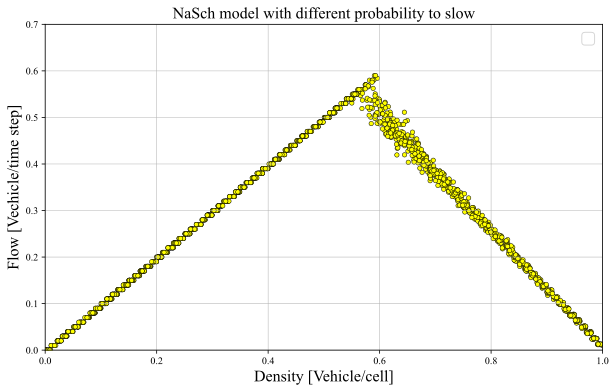

In [153]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)
plt.scatter(NFS_tabel['density'], NFS_tabel['flow'], color='yellow', edgecolors='black', s=20, linewidths=0.5)

plt.ylim(0,0.7)
plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
plt.title(r'NaSch model with different probability to slow', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()